In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import h5py
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = h5py.File('/content/drive/My Drive/Colab Notebooks/pcam_train.h5', "r")

In [4]:
train

<HDF5 file "pcam_train.h5" (mode r)>

In [5]:
train, list(train.keys())

(<HDF5 file "pcam_train.h5" (mode r)>, ['X', 'y'])

In [6]:
X = train["X"][:] / 255.
y = train["y"][:]

In [7]:
X

array([[[[0.35686275, 0.14509804, 0.27843137],
         [0.47058824, 0.26666667, 0.41568627],
         [0.63529412, 0.45490196, 0.60784314],
         ...,
         [0.24705882, 0.08235294, 0.23921569],
         [0.21568627, 0.07843137, 0.19607843],
         [0.28627451, 0.16862745, 0.27058824]],

        [[0.55294118, 0.36078431, 0.47843137],
         [0.54509804, 0.36862745, 0.49019608],
         [0.92941176, 0.76862745, 0.90196078],
         ...,
         [0.23529412, 0.06666667, 0.23529412],
         [0.2745098 , 0.13333333, 0.28235294],
         [0.19607843, 0.0745098 , 0.20784314]],

        [[0.58823529, 0.43137255, 0.53333333],
         [0.79607843, 0.65882353, 0.75294118],
         [1.        , 0.93333333, 1.        ],
         ...,
         [0.45098039, 0.2745098 , 0.42745098],
         [0.32941176, 0.18039216, 0.34117647],
         [0.41568627, 0.28627451, 0.45490196]],

        ...,

        [[0.76862745, 0.58039216, 0.74509804],
         [0.57647059, 0.39215686, 0.56470588]

In [8]:
y

array([1, 1, 0, ..., 1, 1, 1], dtype=uint8)

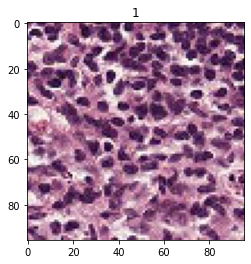

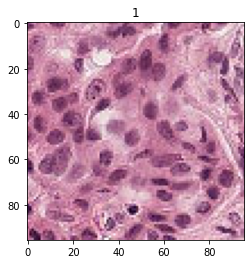

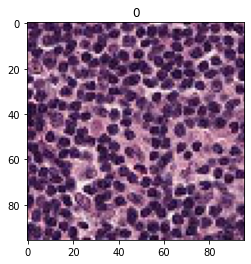

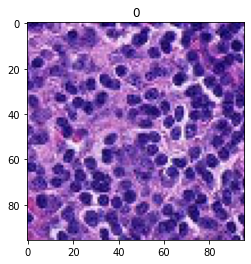

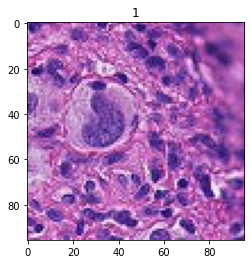

In [15]:
for i in range(5):
    plt.imshow(X[i])
    plt.title(y[i])
    plt.show()

In [10]:
y_arr = np.array(y)

In [11]:
y_arr

array([1, 1, 0, ..., 1, 1, 1], dtype=uint8)

In [12]:
len(y_arr)

29491

In [13]:
X[0]

array([[[0.35686275, 0.14509804, 0.27843137],
        [0.47058824, 0.26666667, 0.41568627],
        [0.63529412, 0.45490196, 0.60784314],
        ...,
        [0.24705882, 0.08235294, 0.23921569],
        [0.21568627, 0.07843137, 0.19607843],
        [0.28627451, 0.16862745, 0.27058824]],

       [[0.55294118, 0.36078431, 0.47843137],
        [0.54509804, 0.36862745, 0.49019608],
        [0.92941176, 0.76862745, 0.90196078],
        ...,
        [0.23529412, 0.06666667, 0.23529412],
        [0.2745098 , 0.13333333, 0.28235294],
        [0.19607843, 0.0745098 , 0.20784314]],

       [[0.58823529, 0.43137255, 0.53333333],
        [0.79607843, 0.65882353, 0.75294118],
        [1.        , 0.93333333, 1.        ],
        ...,
        [0.45098039, 0.2745098 , 0.42745098],
        [0.32941176, 0.18039216, 0.34117647],
        [0.41568627, 0.28627451, 0.45490196]],

       ...,

       [[0.76862745, 0.58039216, 0.74509804],
        [0.57647059, 0.39215686, 0.56470588],
        [0.3372549 , 0

In [14]:
from tensorflow.keras import layers

lr = 3e-4
batch_size = 32
epochs = 20

model = tf.keras.Sequential(
    [
     layers.Conv2D(32,3,activation='relu',padding='same',name='conv1a'),
     layers.Conv2D(32,3,activation='relu',padding='same',name='conv1b'),
     layers.MaxPooling2D(2,2),
     layers.Conv2D(64,3,activation='relu',padding='same',name='conv2a'),
     layers.Conv2D(64,3,activation='relu',padding='same',name='conv2b'),
     layers.MaxPooling2D(2,2),
     layers.Conv2D(128,3,activation='relu',padding='same',name='conv3a'),
     layers.Conv2D(128,3,activation='relu',padding='same',name='conv3b'),
     layers.MaxPooling2D(2,2),
     layers.Flatten(),
     layers.Dense(1024,activation='relu',name='dense1'),
     layers.Dense(21,activation='softmax',name='z')
    ]
)
opt = tf.keras.optimizers.Adam(lr=lr)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics='accuracy')

history = model.fit(X,y,batch_size=batch_size,epochs=epochs,validation_split=0.1,verbose=True)

print(model.summary())

Epoch 1/20
830/830 [==============================] - 24s 29ms/step - loss: 0.4752 - accuracy: 0.7675 - val_loss: 0.4539 - val_accuracy: 0.7993
Epoch 2/20
830/830 [==============================] - 22s 27ms/step - loss: 0.3749 - accuracy: 0.8329 - val_loss: 0.3521 - val_accuracy: 0.8515
Epoch 3/20
830/830 [==============================] - 22s 27ms/step - loss: 0.3032 - accuracy: 0.8717 - val_loss: 0.2532 - val_accuracy: 0.8885
Epoch 4/20
830/830 [==============================] - 23s 27ms/step - loss: 0.2378 - accuracy: 0.9042 - val_loss: 0.3153 - val_accuracy: 0.8627
Epoch 5/20
830/830 [==============================] - 23s 27ms/step - loss: 0.1841 - accuracy: 0.9263 - val_loss: 0.2257 - val_accuracy: 0.9169
Epoch 6/20
830/830 [==============================] - 23s 28ms/step - loss: 0.1379 - accuracy: 0.9479 - val_loss: 0.2090 - val_accuracy: 0.9200
Epoch 7/20
830/830 [==============================] - 23s 28ms/step - loss: 0.1001 - accuracy: 0.9632 - val_loss: 0.2065 - val_accuracy: